<a href="https://colab.research.google.com/github/ck46/kmeans/blob/main/k_means_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KMeans Algorithm

In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
arr = np.random.rand(100,100)
arr

array([[0.82210216, 0.45835616, 0.6426287 , ..., 0.82327249, 0.72038435,
        0.77522249],
       [0.34419163, 0.49147903, 0.09291409, ..., 0.65888034, 0.41593261,
        0.78146313],
       [0.92331214, 0.90184754, 0.55091455, ..., 0.59849668, 0.69737859,
        0.24941505],
       ...,
       [0.82842683, 0.03121084, 0.68038664, ..., 0.41229807, 0.44368658,
        0.51696221],
       [0.69110023, 0.62455361, 0.47355021, ..., 0.65406879, 0.48966549,
        0.53643729],
       [0.14283266, 0.06353415, 0.53079637, ..., 0.02451256, 0.3160555 ,
        0.7768205 ]])

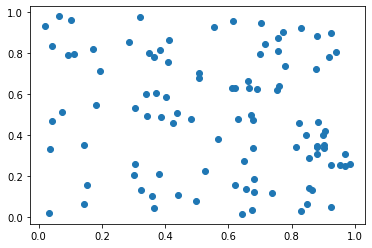

In [46]:
plt.scatter(arr[:, 0], arr[:, 1])

In [56]:
# KMeans algorithm for 2D arrays
class KMeans2D:
  def __init__(self, k=10):
    self.clusters = {i:[np.random.rand(), []] for i in range(k)}
  
  def train(self, arr, iters=100):
    iter = 0
    print("Training", end='')
    while iter < iters:
      print('*', end='')
      ## reset clusters
      for c in self.clusters.keys():
              self.clusters[c][1] = []
      # Cluster assignment
      for i in range(len(arr)):
        for j in range(len(arr[0])):
          n = arr[i][j]   
          min_distance = float('inf')
          for c in self.clusters.keys():
              d = abs(n - self.clusters[c][0])
              if d < min_distance:
                  centroid = c
                  min_distance = d
          self.clusters[centroid][1].append(n)
      # Move centroids 
      for c in self.clusters.keys():
          cluster = self.clusters[c][1]
          if len(cluster) == 0:
              self.clusters[c][0] = np.random.rand()
          else:
              self.clusters[c][0] = np.mean(cluster)
      iter += 1
    print("done!")
    return self.clusters

  def predict_n(self, n):
    min_distance = float('inf')
    for c in self.clusters.keys():
        d = abs(n - self.clusters[c][0])
        if d < min_distance:
            centroid_id = c
            min_distance = d
    return centroid_id
  
  def predict_arr(self, arr):
    min_distance = float('inf')
    centroids = np.zeros(arr.shape)
    for i in range(len(arr)):
      for j in range(len(arr[0])):
        n = arr[i][j]   
        min_distance = float('inf')
        for c in self.clusters.keys():
            d = abs(n - self.clusters[c][0])
            if d < min_distance:
                centroid = c
                min_distance = d
        centroids[i][j] = centroid
    return centroids

In [57]:
k_means_2d = KMeans2D(10)
clusters = k_means_2d.train(arr, 100)

Training****************************************************************************************************done!


In [58]:
for k in clusters.keys():
  print(f"Cluster id: {k}, Centroid: {clusters[k][0]}") # cluster (id, centroids)

Cluster id: 0, Centroid: 0.7187382473945266
Cluster id: 1, Centroid: 0.8264353617687917
Cluster id: 2, Centroid: 0.314791054168676
Cluster id: 3, Centroid: 0.5084487069472057
Cluster id: 4, Centroid: 0.9416387391136753
Cluster id: 5, Centroid: 0.6146929830206372
Cluster id: 6, Centroid: 0.04443757298128017
Cluster id: 7, Centroid: 0.1356010230781816
Cluster id: 8, Centroid: 0.22450860652255883
Cluster id: 9, Centroid: 0.40892360824236035


In [59]:
labels = k_means_2d.predict_arr(arr)
labels

array([[1., 9., 5., ..., 1., 0., 1.],
       [2., 3., 7., ..., 5., 9., 1.],
       [4., 4., 3., ..., 5., 0., 8.],
       ...,
       [1., 6., 0., ..., 9., 9., 3.],
       [0., 5., 3., ..., 5., 3., 3.],
       [7., 6., 3., ..., 6., 2., 1.]])